In [15]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

import inspect, os.path

filename = inspect.getframeinfo(inspect.currentframe()).filename
path     = os.path.dirname(os.path.abspath(filename))
print(os.path.join(path, 'content/file.dot'))

/home/tim/git/thesis/code/graph_gen/content/file.dot


In [2]:
import maze

from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import write_dot, read_dot
import networkx as nx

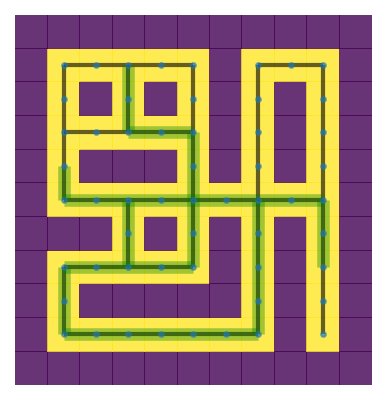

In [3]:
from routes import Mgraph

mg = Mgraph(11)
g, pos = mg.G, mg.pos

selected = np.random.randint(0, len(mg.nodes), size = 15)
routes = np.vstack((selected[:-1], selected[1:]))
datasetgt, trajs = mg.gen_routes(routes)

fig = plt.figure(num = "field3", figsize=(3,3), dpi = 150)
mg.plot_field(fig)
nx.draw(g, pos, alpha = 0.6, node_size = 5, width = 2)
for ti in trajs:
    H = g.subgraph(ti)
    nx.draw_networkx_edges(H, pos = pos, edge_color='g', width = 6, alpha=0.2)
plt.show()

In [4]:
# !pip install pydot

In [5]:
from networkx.drawing.nx_agraph import graphviz_layout
# from networkx.drawing.nx_pydot import write_dot, read_dot
from networkx.readwrite.json_graph import jit_data, jit_graph
import json

saveto_z = os.path.join(path, 'content/graph.dat')
saveto_g = os.path.join(path, 'content/file.json')

data = jit_data(g)
with open(saveto_g, 'w') as file:
        json.dump(data, file)
mg.Z.tofile(saveto_z)

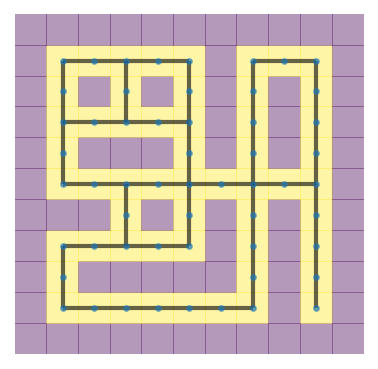

In [6]:
# learn howto read and rwite graph to json file
# data = None

# with open(saveto_g, "r") as read_file:
#     data = json.load(read_file)
# gr = jit_graph(data)

n = mg.boxsize

Z = np.fromfile(saveto_z)
Z = Z.reshape(mg.boxsize, -1)
# print(Z)

# mg = Mgraph(gr, Z)

mg_new = Mgraph(n, g, mg.Z)
# mg_new = Mgraph(gr, Z) # saving to json doesn.t work here

gr = mg_new.G
pos = mg_new.pos

fig = plt.figure(num = "routes", figsize=(3,3), dpi = 150)

# mg_new.plot_field(fig)

offx, offy = 0, 0
x = np.arange(offx, mg_new.boxsize + offy, 1)
y = np.arange(offx, mg_new.boxsize + offy, 1)
plt.pcolormesh(y, x, Z.T, alpha=0.4, shading='auto')
# plt.pcolormesh(x, y, Z, alpha=0.4, shading='auto')

nx.draw(gr, pos, alpha = 0.6, node_size = 5, width = 2)
plt.show()

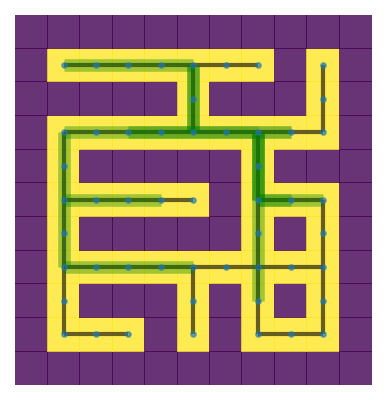

In [7]:
def gen_routes(mg, n):
    selected = np.random.randint(0, len(mg.G.nodes), size = n)
    routes = np.vstack((selected[:-1], selected[1:]))
    datasetgt, trajs = mg.gen_routes(routes)
    return datasetgt, trajs

mg = mg_new

datasetgt, trajs = gen_routes(mg, 15)

fig = plt.figure(num = "routes", figsize=(3,3), dpi = 150)
mg.plot_field(fig)
nx.draw(g, pos = pos, alpha = 0.6, node_size = 5, width = 2)
for ti in trajs:
    H = g.subgraph(ti)
    nx.draw_networkx_edges(H, pos = pos, edge_color='g', width = 6, alpha=0.2)

plt.savefig(os.path.join(path, 'content/routes.png'))
plt.show()

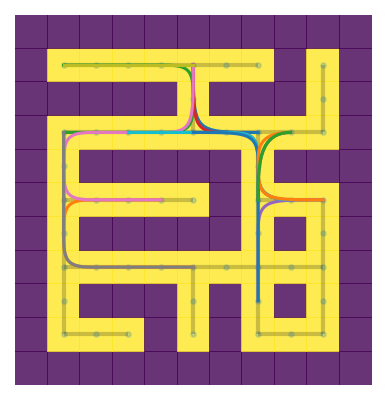

In [8]:
import geomdl
from geomdl import BSpline
from geomdl import utilities

plt.close()
fig = plt.figure(num = "bspline", figsize=(3,3), dpi = 150)

mg.plot_field(fig)
nx.draw(g, pos = pos, alpha = 0.2, node_size = 5, width = 2)
# plt.show()

# x = np.arange(-0.5, boxsize - 0.5, 1)
# y = np.arange(-0.5, boxsize - 0.5, 1)
# plt.pcolormesh(y, x, Z.T, alpha=0.2)
# nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=2)

ds = []

for tr in datasetgt:
  if tr.shape[0] > 3:
    curve = BSpline.Curve()
    curve.degree = 3

    curve.ctrlpts = tr.tolist()
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    pts = np.array(curve.evalpts)

    ds.append(pts)
    plt.plot(pts[:, 0], pts[:, 1])

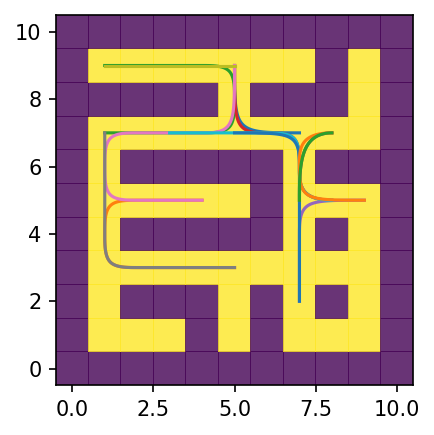

In [49]:
fig = plt.figure(figsize=(3,3), dpi = 150)
mg.plot_field(fig)
plt.tight_layout()

for pts in ds:
    plt.plot(pts[:, 0], pts[:, 1])

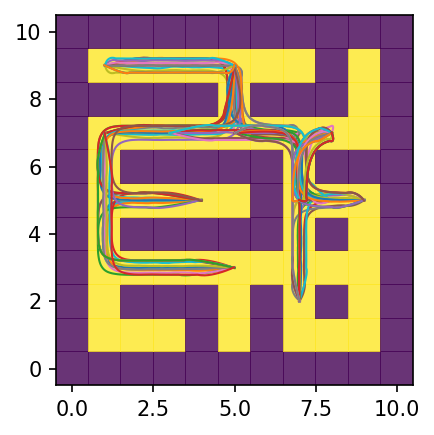

In [69]:
from NoisyTraj import NoisyTraj

fig = plt.figure(figsize=(3,3), dpi = 150)
mg.plot_field(fig)
plt.tight_layout()

noisy_dat = []

for tr in datasetgt:
    nt = NoisyTraj(tr)
    if nt.curve == None:
        continue
    obs = nt.data_gen()
    # obs = nt.data_gen(8)
    noisy_dat.append(obs)
    for oi in obs:
        plt.plot(oi[0, :], oi[1, :], linewidth = 1)

plt.show()

In [1]:
from scipy.interpolate import interpolate
import matplotlib.patches as patches


G, Z = mg.G, mg.Z
boxsize = mg.boxsize

extent = (0.5, boxsize - 1.5, 0.5, boxsize - 1.5)
x = np.linspace(extent[0], extent[1], boxsize - 1)
y = np.linspace(extent[0], extent[1], boxsize - 1)

# np.linspace()

xx, yy = np.meshgrid(x, y)

z = np.random.randn(boxsize - 1, boxsize - 1)
interp = interpolate.interp2d(xx, yy, z, kind='linear')
zz = interp(x, y)

fig = plt.figure(figsize=(3,3), dpi = 150)
ax = plt.gca()

# fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'xticks': [], 'yticks': []})
# axs.set_aspect('equal')
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi = 150, subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(zz, interpolation='spline36', resample=True, extent = extent)

plt.axis("equal")

nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=1, edge_color='w', node_color='w')

# plt.scatter(xx, yy, color='r')

for i in range(boxsize):
  for j in range(boxsize):
    if Z[i][j] == 0:
      rect = patches.Rectangle(xy = (i - 0.5, j - 0.5), width = 1., height=1., color = 'gray')
      ax.add_patch(rect)

for obs in noisy_dat:
    for oi in obs:
        plt.plot(oi[0, :], oi[1, :], linewidth = 1)
 
plt.show()

NameError: name 'mg' is not defined

In [12]:

import json
import os.path
import inspect

import numpy as np
import pandas as pd
nums = np.random.randn(3, 3)

f = {0: nums, 1: "1", index = 0}
ds = pd.DataFrame(f, dtype=object)
# ds = pd.DataFrame(np.ndarray([nums, "1"], dtype=object))
z = ds.to_json(orient='values')
pd.read_json(z, orient='values')[0]


SyntaxError: invalid syntax (<ipython-input-12-1deabd78bf35>, line 9)

In [14]:
import json
r = {'nums': nums, 'rating': 3.5}
r = json.dumps(r)
loaded_r = json.loads(r)
loaded_r['nums']

TypeError: Object of type ndarray is not JSON serializable

In [9]:
!pip install dtw-python

  Using cached dtw_python-1.1.10-cp38-cp38-manylinux2010_x86_64.whl (623 kB)


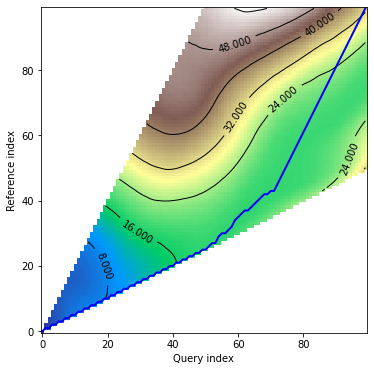

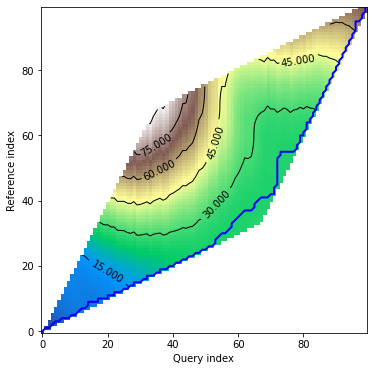

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [16]:
from dtw import *
(query, reference) = dtw_test_data.sin_cos()
ita = dtw(query, reference, keep_internals=True, step_pattern=typeIIIc)
dtwPlotDensity(ita)                              # doctest: +SKIP

# Symmetric step with global parallelogram-shaped constraint. Note how long (>2 steps) horizontal stretches are allowed within the window.
ita = dtw(query, reference, keep_internals=True, window_type=itakuraWindow)
dtwPlotDensity(ita)       

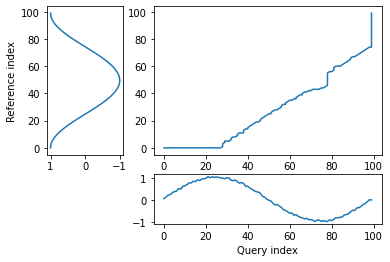

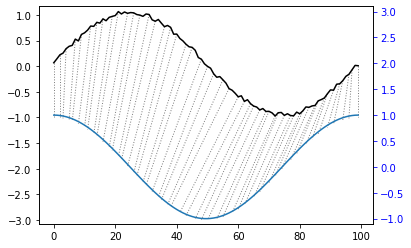

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



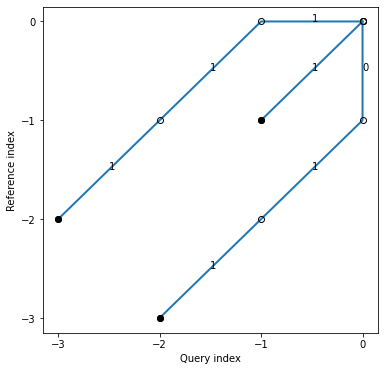

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [17]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
# print(dist, cost, acc, path)
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

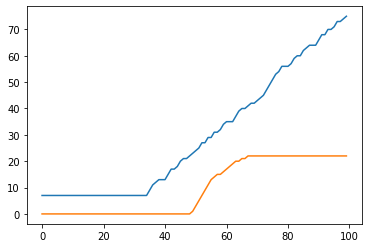

In [22]:
## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0
query2 = np.sin(idx) + np.random.uniform(size=100)/10.0 + 1.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
# alignment = dtw(query, template, keep_internals=True)
# ## Display the warping curve, i.e. the alignment curve
# alignment.plot(type="threeway")

# ## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
# dtw(query, template, keep_internals=True, 
#     step_pattern=rabinerJuangStepPattern(6, "c"))\
#     .plot(type="twoway",offset=-2)

# alignment = dtw(query, template, keep_internals=True).plot(type="twoway",offset=-2)
fig = plt.figure()
alignment = dtw(query, template, keep_internals=True,\
    step_pattern=asymmetric, open_end=True,open_begin=True)
alignment = dtw(dist_method = scipy.spatial.distance.cdist, query, template, keep_internals=True,\
    step_pattern=asymmetric, open_end=True,open_begin=True)
# \
plt.plot()
# .plot(type="twoway",offset=4)
plt.plot(alignment.index1, alignment.index2)
alignment = dtw(query2, template, keep_internals=True,\
    step_pattern=asymmetric, open_end=True,open_begin=True)
# .plot(type="twoway",offset=4, )
plt.plot(alignment.index1, alignment.index2)
plt.show()
# alignment = dtw(query, template, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c"))
# alignment.plot(type="twoway",offset=4)
# alignment.plot(type="twoway",offset=-4)
## Display the warping curve, i.e. the alignment curve
# alignment.plot(type="threeway")

In [65]:
# import scipy.spatial.distance.cdist as cdist

from scipy.spatial import distance
from scipy.spatial.distance import cdist, cosine

coords = [(35.0456, -85.2672),

          (35.1174, -89.9711),

          (35.9728, -83.9422),

          (36.1667, -86.7833)]

distance.cdist(coords, coords, 'euclidean')

dm = cdist(coords, coords, lambda u, v: np.sqrt(((u-v)**2).sum()))
dcos = distance.cosine([1, 0, 0], [0, 1, 0])
# print(dcos)
# coords

coords = [[35.0456, -85.2672, 5.0456, 5.2672],
          [35.1174, -89.9711, 5.1174, 9.9711],
          [35.9728, -83.9422, 5.9728, 3.9422],
          [36.1667, -86.7833, 6.1667, 6.7833]]

def dist(u, v):
    # nu = np.array(u)
    # nv = np.array(v)
    # d1 = cdist(nu[:, :2], nv[:, :2], 'euclidean') 
    # return d1 + distance.cosine(nu[:, 2:], nv[:, 2:])
    d1 = cdist(u[:, :2], v[:, :2], 'euclidean')
    d2 = np.array([list(map(cosine, ui[2:], v[:, 2:])) for ui in u]) 
    print("d1, d2", d1, d2)
    return d1 + d2

nc = np.array(coords)

dist(nc[:2], nc[2:])
# def cos_vec(u, v):
#     return [ distance.cosine(u[i], v[i]) for i in range(len(u))]

# cos_vec(nc[:2, 2:], nc[2:, 2:])
n = 15
nc = np.array([
    np.linspace(0, 10, n),
    np.linspace(7, 12, n),
    np.linspace(0, 5, n),
    np.linspace(0, 3, n),
]).T

dist(nc, nc)

d1, d2 [[1.6171966  1.88558331]
 [6.0892811  3.35605413]] [[0.02033421 0.00113162]
 [0.02033421 0.00113162]]
d1, d2 [[ 0.          0.79859571  1.59719141  2.39578712  3.19438282  3.99297853
   4.79157424  5.59016994  6.38876565  7.18736136  7.98595706  8.78455277
   9.58314847 10.38174418 11.18033989]
 [ 0.79859571  0.          0.79859571  1.59719141  2.39578712  3.19438282
   3.99297853  4.79157424  5.59016994  6.38876565  7.18736136  7.98595706
   8.78455277  9.58314847 10.38174418]
 [ 1.59719141  0.79859571  0.          0.79859571  1.59719141  2.39578712
   3.19438282  3.99297853  4.79157424  5.59016994  6.38876565  7.18736136
   7.98595706  8.78455277  9.58314847]
 [ 2.39578712  1.59719141  0.79859571  0.          0.79859571  1.59719141
   2.39578712  3.19438282  3.99297853  4.79157424  5.59016994  6.38876565
   7.18736136  7.98595706  8.78455277]
 [ 3.19438282  2.39578712  1.59719141  0.79859571  0.          0.79859571
   1.59719141  2.39578712  3.19438282  3.99297853  4.79157424 

ValueError: operands could not be broadcast together with shapes (15,15) (15,2) 